<a href="https://colab.research.google.com/github/harsh2k1/LGMVIP-DataScience/blob/main/DecisionTreeClassifierIris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Name : Harshpreet Singh
## ʟɢᴍᴠɪᴩᴏᴄᴛᴏʙᴇʀ
## Task-1

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , KFold, GridSearchCV
kfold = KFold(n_splits=5)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix , plot_confusion_matrix , plot_precision_recall_curve , roc_auc_score , roc_curve ,accuracy_score

In [ ]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.drop(['Id'], axis = 1, inplace = True)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.shape

(150, 5)

In [ ]:
df.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [ ]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

# Data Visualization

Text(0.5, 1.0, 'Boxplot of Sepal Length')

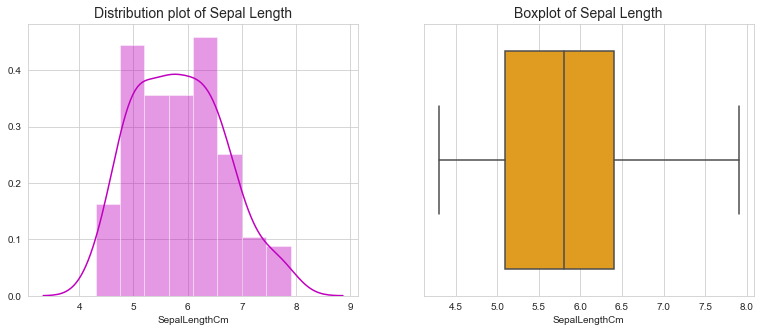

In [ ]:
# Distribution of Sepal Length
_, (ax1,ax2) = plt.subplots(1,2,figsize = (13,5))
sns.set_style('whitegrid')
sns.distplot(df.iloc[:,0] , color='m', ax = ax1)
ax1.set_title('Distribution plot of Sepal Length', fontsize = 14)
sns.boxplot(df.iloc[:,0], color = 'orange',ax = ax2)
ax2.set_title('Boxplot of Sepal Length', fontsize = 14)

Text(0.5, 1.0, 'Boxplot of Sepal Width')

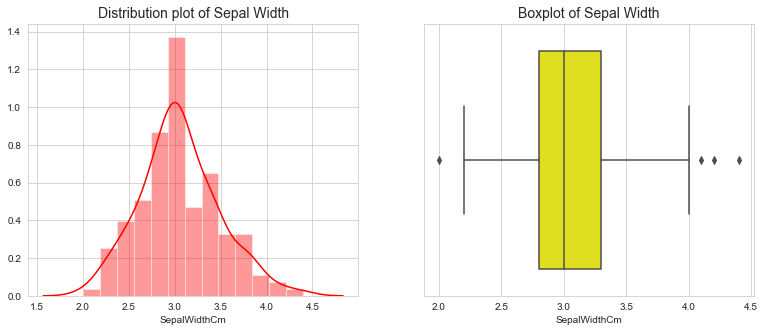

In [ ]:
# Distribution of Sepal Width
_, (ax1,ax2) = plt.subplots(1,2,figsize = (13,5))
sns.set_style('whitegrid')
sns.distplot(df.iloc[:,1] , color='red', ax = ax1)
ax1.set_title('Distribution plot of Sepal Width', fontsize = 14)
sns.boxplot(df.iloc[:,1], color = 'yellow',ax = ax2)
ax2.set_title('Boxplot of Sepal Width', fontsize = 14)

Text(0.5, 1.0, 'Boxplot of Petal Length')

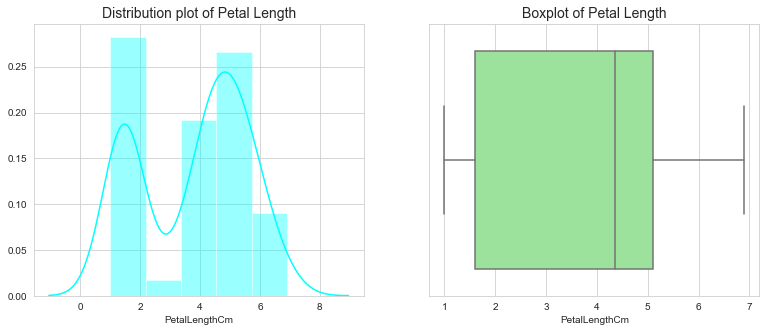

In [ ]:
# Distribution of Petal Length
_, (ax1,ax2) = plt.subplots(1,2,figsize = (13,5))
sns.set_style('whitegrid')
sns.distplot(df.iloc[:,2] , color='cyan', ax = ax1)
ax1.set_title('Distribution plot of Petal Length', fontsize = 14)
sns.boxplot(df.iloc[:,2], color = 'lightgreen',ax = ax2)
ax2.set_title('Boxplot of Petal Length', fontsize = 14)

Text(0.5, 1.0, 'Boxplot of Sepal Width')

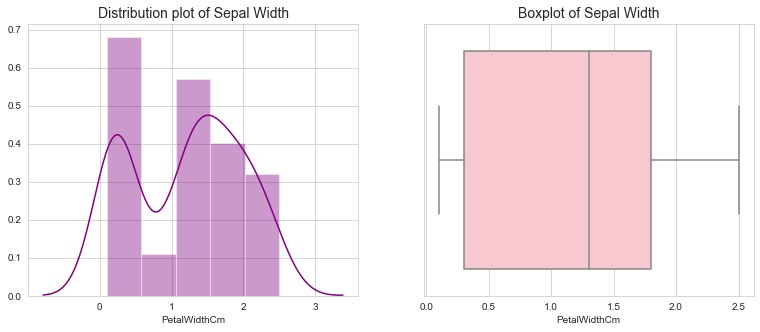

In [ ]:
# Distribution of Sepal Width
_, (ax1,ax2) = plt.subplots(1,2,figsize = (13,5))
sns.set_style('whitegrid')
sns.distplot(df.iloc[:,3] , color='purple', ax = ax1)
ax1.set_title('Distribution plot of Sepal Width', fontsize = 14)
sns.boxplot(df.iloc[:,3], color = 'pink',ax = ax2)
ax2.set_title('Boxplot of Sepal Width', fontsize = 14)

Text(0, 0.5, 'Sepal Length')

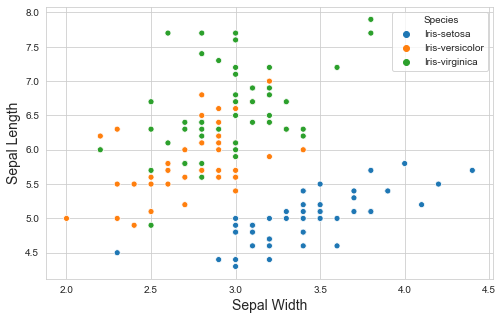

In [ ]:
# Sepal Length vs Sepal Width
plt.figure(figsize=(8,5))
sns.scatterplot(df.iloc[:,1], df.iloc[:,0], hue = df.iloc[:,-1])
plt.xlabel('Sepal Width', fontsize = 14)
plt.ylabel('Sepal Length', fontsize = 14)

Text(0, 0.5, 'Petal Length')

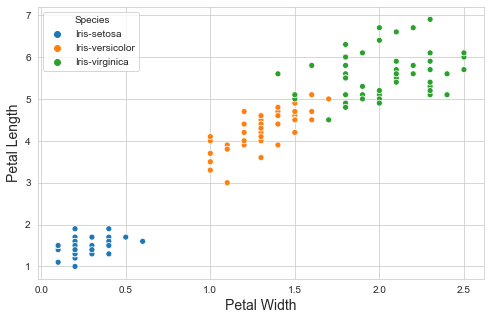

In [ ]:
# Petal Length vs Petal Width
plt.figure(figsize=(8,5))
sns.scatterplot(df.iloc[:,3], df.iloc[:,2], hue = df.iloc[:,-1])
plt.xlabel('Petal Width', fontsize = 14)
plt.ylabel('Petal Length', fontsize = 14)

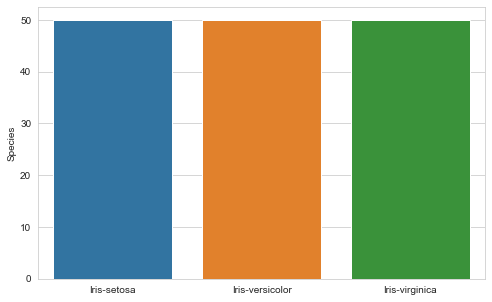

In [ ]:
# Value counts of Species
plt.figure(figsize = (8,5))
sns.barplot(x = df.iloc[:,-1].unique(), y = df.iloc[:,-1].value_counts())

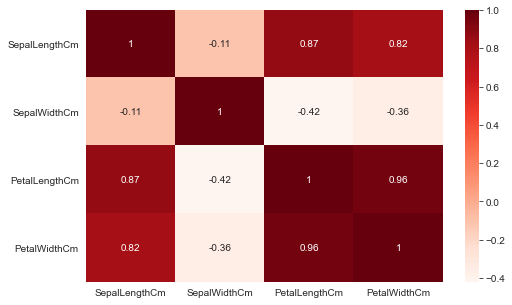

In [ ]:
# Correlation
plt.figure(figsize = (8,5))
sns.heatmap(df.corr() , annot = True , cmap = 'Reds')

# Data Pre-Processing

## Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [ ]:
df.iloc[:,-1] = label.fit_transform(df.iloc[:,-1])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Data Splitting

In [ ]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y, test_size=0.20, random_state=42)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((120, 4), (30, 4), (120,), (30,))

## Data Standardization

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Modelling

In [ ]:
model = DecisionTreeClassifier()
criterion = ['gini' , 'entropy']
max_depth = [4,6,8,10,12]
min_samples_split = [1,2,3,4,5]
min_samples_leaf = [1,2,3,4,5]
parameters = {'criterion': criterion , 'max_depth': max_depth , 'min_samples_split':min_samples_split , 'min_samples_leaf':min_samples_leaf}
clf_GS = GridSearchCV(estimator = model, param_grid=parameters)
clf_GS.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5]})

In [ ]:
print(f'Got best score of {clf_GS.best_score_} with params = {clf_GS.best_params_}')

Got best score of 0.9583333333333334 with params = {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}


In [ ]:
# Training Model with best params
clf_dt = DecisionTreeClassifier(**clf_GS.best_params_)
clf_dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=3)

# Experimental Analysis

In [ ]:
df['Species'] = label.inverse_transform(df.iloc[:,-1])

## Plotting Decision Tree

[Text(443.8636363636364, 1223.1, 'PetalWidthCm <= -0.51\ngini = 0.667\nsamples = 120\nvalue = [40, 41, 39]\nclass = Iris-versicolor'),
 Text(317.0454545454545, 951.3, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = Iris-setosa'),
 Text(570.6818181818181, 951.3, 'PetalLengthCm <= 0.586\ngini = 0.5\nsamples = 80\nvalue = [0, 41, 39]\nclass = Iris-versicolor'),
 Text(253.63636363636363, 679.5, 'SepalLengthCm <= -0.925\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]\nclass = Iris-versicolor'),
 Text(126.81818181818181, 407.69999999999993, 'gini = 0.375\nsamples = 4\nvalue = [0, 3, 1]\nclass = Iris-versicolor'),
 Text(380.45454545454544, 407.69999999999993, 'gini = 0.0\nsamples = 33\nvalue = [0, 33, 0]\nclass = Iris-versicolor'),
 Text(887.7272727272727, 679.5, 'PetalWidthCm <= 0.756\ngini = 0.206\nsamples = 43\nvalue = [0, 5, 38]\nclass = Iris-virginica'),
 Text(634.090909090909, 407.69999999999993, 'PetalLengthCm <= 0.758\ngini = 0.5\nsamples = 8\nvalue = [0, 4, 4]\nclass = Iris-ve

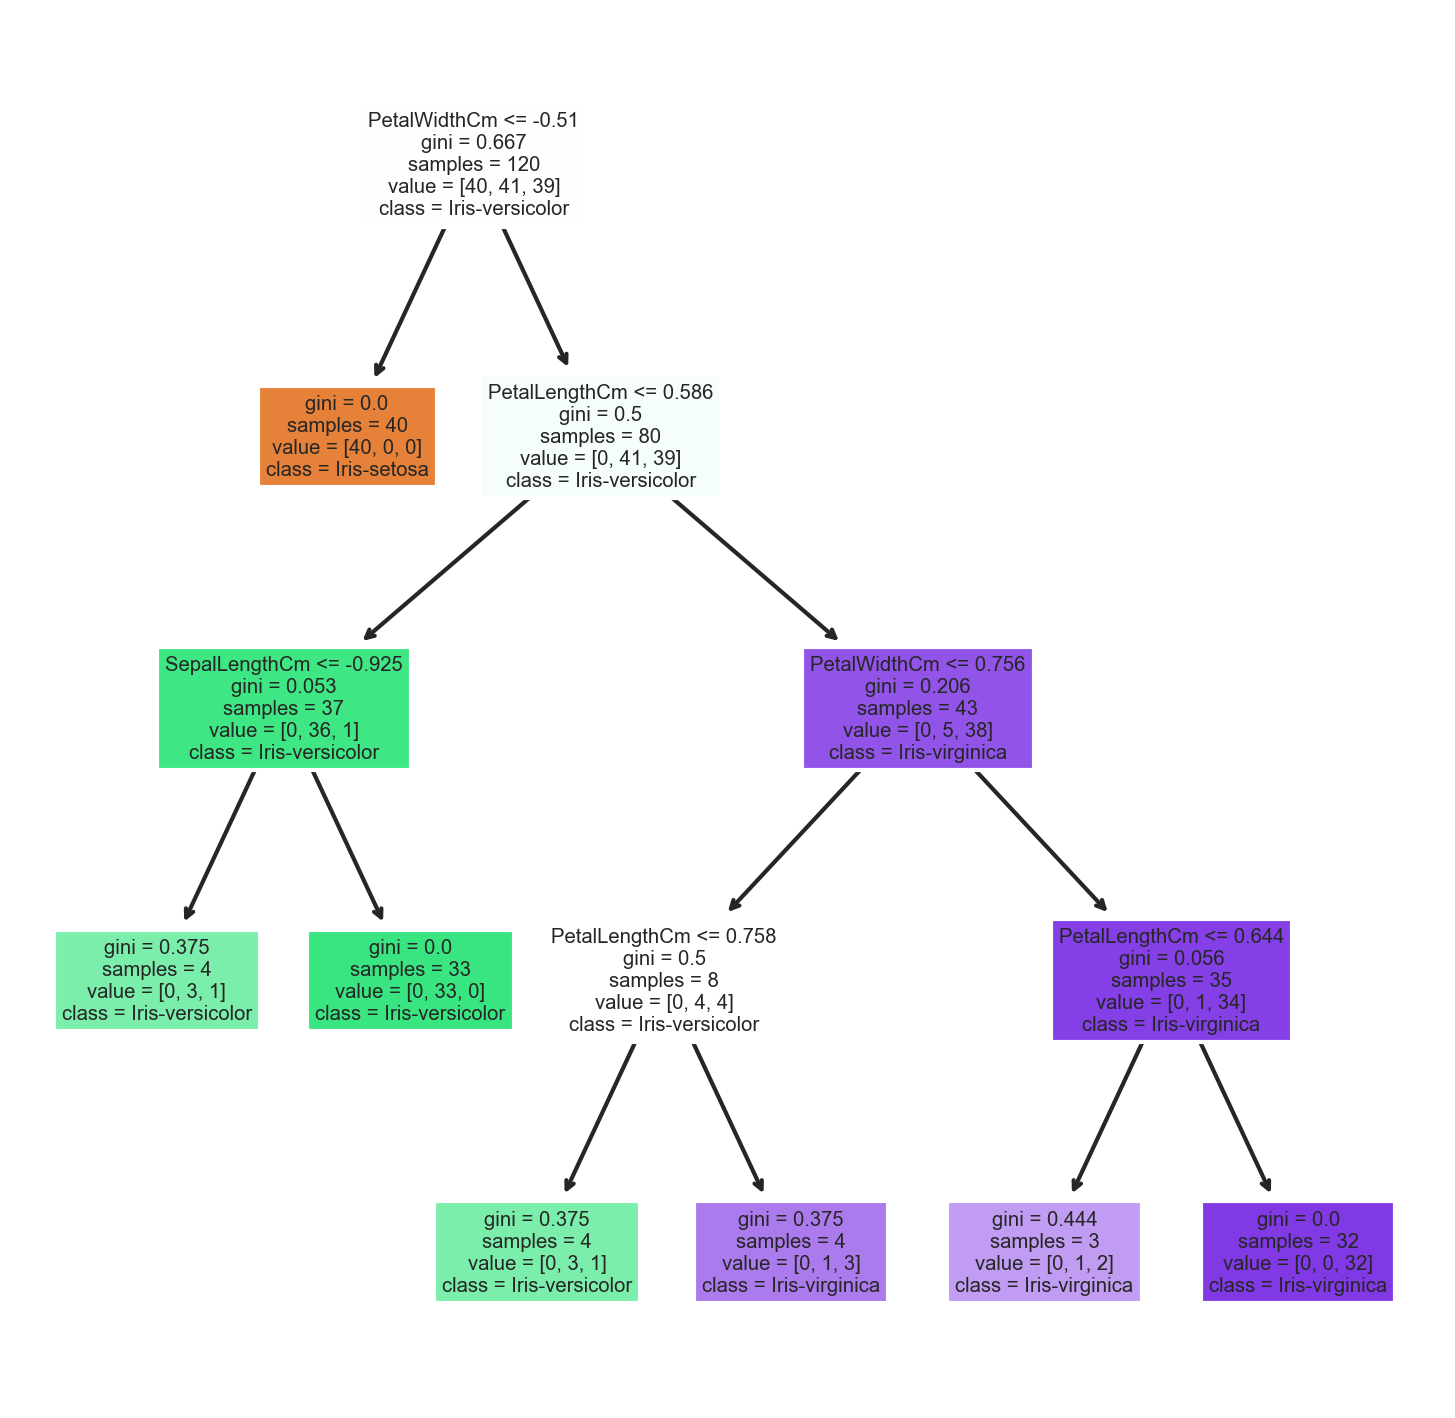

In [ ]:
from sklearn import tree
fn= df.columns
cn=df['Species'].unique()
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=300)
tree.plot_tree(clf_dt,
               feature_names = fn, 
               class_names=cn,
               filled = True)

In [ ]:
from sklearn.metrics import recall_score , precision_score , f1_score , roc_auc_score

In [ ]:
# Training Performance
y_pred_train = clf_dt.predict(X_train)
training_accuracy = accuracy_score(y_pred_train , y_train)
training_precision = precision_score(y_pred_train , y_train, average = 'weighted')
training_recall = recall_score(y_pred_train , y_train, average = 'weighted')
training_f1 = f1_score(y_pred_train , y_train, average = 'weighted')
# training_auc = roc_auc_score(y_pred_train, y_train, average = 'weighted', multi_class='ovo')

# Testing Performance
y_pred_test = clf_dt.predict(X_test)
testing_accuracy = accuracy_score(y_pred_test , y_test)
testing_precision = precision_score(y_pred_test , y_test, average = 'weighted')
testing_recall = recall_score(y_pred_test , y_test, average = 'weighted')
testing_f1 = f1_score(y_pred_test , y_test, average = 'weighted')
# testing_auc = roc_auc_score(y_pred_test , y_test, average = 'weighted', multi_class='ovo')

# Creating a dataframe
evaluation = {
    'Criteria':['Training','Testing'],
    'Accuracy':[training_accuracy, testing_accuracy],
    'Precision':[training_precision, testing_precision],
    'Recall': [training_recall, testing_recall],
    'F1_Score': [training_f1, testing_f1],
    #'ROC_AUC_Score': [training_auc, testing_auc]
}
evaluation_df = pd.DataFrame(evaluation)
evaluation_df

,Criteria,Accuracy,Precision,Recall,F1_Score
0,Training,0.966667,0.966667,0.966667,0.966667
1,Testing,0.966667,0.969697,0.966667,0.966583


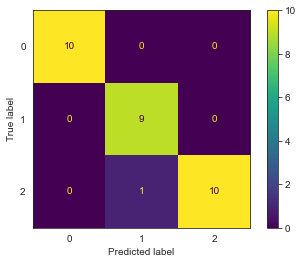

In [ ]:
# Confusion Matrix
sns.set_style('white')
plot_confusion_matrix(clf_dt , X_test , y_test)